# Introduction

Network theory is a powerful tool in the study of complex systems and has been increasingly applied to the field of biology in recent years. One area in particular where network theory has made a significant impact is in the study of protein-protein interaction (PPI) networks. PPI networks provide a way to represent the molecular interactions between proteins within a cell and are crucial for understanding cellular function and processes such as signal transduction and gene regulation.

Below you will find two networks, representing the yeast (left) and the human (right) interactomes.

![Yeast an human PPIs](images/ppis.png)

While these networks provide extremely valuable information, the number of nodes they include is so large to make understanding their structure difficult. Network theory provides a principled approach that is applicable even to large-scale data sets. By constructing a PPI network, researchers can gain a global perspective on the organization and function of proteins within a cell and make predictions about the effects of perturbations, such as the introduction of a drug or mutation, on the cellular network.

There are several measures in network theory that are useful in the analysis of PPI networks. The degree distribution of a network is a measure of the number of connections (or "degrees") that a node has to other nodes in the network. A scale-free network is one in which a few nodes have many connections (high-degree nodes), while most nodes have only a few connections (low-degree nodes). PPI networks have been shown to exhibit scale-free behavior, with a small number of highly connected proteins, known as "hubs," playing a central role.

The clustering coefficient is another useful measure that captures the degree of local interconnectedness in the network. The clustering coefficient of a node is calculated by counting the number of links between the vertices within its neighbourhood divided by the number of links that could possibly exist between them. A high clustering coefficient indicates a high degree of local interconnectedness, while a low clustering coefficient indicates a more dispersed network structure.

Another important concept of network theory is the shortest path. A shortest path represents the shortest distance between two nodes in a network, and it offers the most direct route of communication between them. In PPI networks, the shortest paths between proteins provide insights into the functional relationships between them and can be used to identify key players in signaling pathways or to predict the effects of perturbations on the network. For instance, if a mutation occurs in a protein that is part of a shortest path between two other proteins, it is likely to have a significant effect on the communication between those proteins and could disrupt normal cellular processes.

Finally, PageRank is a measure that was originally developed for the analysis of the World Wide Web, but has been applied to the study of PPI networks as well. PageRank is a measure of the importance of a node in a network and is based on the idea that a node is more important if it is connected to other important nodes. The PageRank of a node is calculated based on the number and importance of the nodes that link to it, as well as the number and importance of the nodes that those nodes link to, and so on.

In this notebook we are going to use some Python code to compute the above measures, and observe how they differ in biological and random networks.

## PPI Network

We are going to use the [SNAP](http://snap.stanford.edu/snappy/index.html) software to store and to manipulate graphs. In the cell below we import the library into our current Python enviroment to gain access to all of its functions.

In [1]:
import snap

We have already downloaded a table describing the [protein-protein interaction network](http://snap.stanford.edu/pathways/) that contains physical interactions between proteins that are experimentally documented in humans.

Let's take a quick look at the first few lines in the file.

In [2]:
!head network.csv

1394,2778
6331,17999
122704,54460
2597,2911
4790,79155
6146,101929876
109,27115
1390,84528
324,10982
26268,6500


Every line represents an edge between two proteins, that are identified by their Entrez Gene ID.

To represent this information in Python we are going to create an appropriate graph object.

In [3]:
g = snap.TUNGraph.New()

"UN" stands for "undirected", and represents the fact that here we are not interested in the direction associated with an edge. We assume protein-protein interactions are symmetric.

In [4]:
seen = set()
with open("network.csv", "rt") as fd:
    for line in fd:
        src, tgt = line.split(",")
        src = int(src)
        tgt = int(tgt)
        
        if src not in seen:
            g.AddNode(src)
            seen.add(src)
            
        if tgt not in seen:
            g.AddNode(tgt)
            seen.add(tgt)
            
        g.AddEdge(src, tgt)

The code above is responsible for reading the edge table and for storing the relevant information in the graph `g`. The main steps are:

  * **Line 1**. Define a set containing all the nodes we have encountered. Initially, the set is empty.
  * **Line 2**. Open the network file. We will read from it through the `fd` variable.
  * **Line 3**. Loop over all the lines in the file.
  * **Line 4**. The IDs of the nodes are separated by a ",", which we use to split the line into two parts.
  * **Lines 5-6**. Initially the node names are strings. Here we convert them to integers.
  * **Line 8**. We can only add a node to a network once. To avoid duplicating them, we check if we have seen that node before. If not, we add it to the graph object and we mark it as seen. Otherwise, the skip it.
  * **Line 16**. We finally add a new edge, identified by the two nodes it connects.

(If you don't see the line numbers in the cell above, activate their display through the menu "View -> Toggle Line Numbers".)
  
To understand the size of the network we have created, we can measure how many nodes and edges it contains.

In [5]:
g.GetNodes()

21557

In [6]:
g.GetEdges()

342353

## Random Graph

It would be useful to compare our newly created PPI network to a second graph of some sort. For this purpose we are going to create on a *completely random* graph.

We can obtain it by means of a simple procedure. First we create as many nodes as there are proteins in the original PPI network. Then we start connecting pairs of nodes at random, until we have the same number of edges as in the first graph.

It would be relatively easy to implement this procedure ourselves, but SNAP already provides a function for doing that.

In [7]:
rg = snap.GenRndGnm(snap.TUNGraph, g.GetNodes(), g.GetEdges())

Notice that we haven't tried to generate any graphical plot of these networks. That's intentional, for two different reasons:

  1. Even on a high-resolution display, it would be difficult to pick apart the nodes, let alone the edges connecting them.
  1. In light of this difficulties, we would rather like to come up with a mathematical measure to compare graphs. We could use it for any network, regardless of size.

## Connectivity

A node is said to have a specific *connectivity degree*, which is a number representing how many neighbors that node is connected to.

![A small graph](images/tree.png)

In the graph above node **1** has a degree of `1`: it has a single neighbor. Node **5**, on the other hand, is connected to both nodes **4** and **6**. Its degree is therefore `2`.

With a single command we can generate a table listing home many nodes in our PPI network have a given degree.

In [8]:
ppi_distrib = [(p.GetVal1(), p.GetVal2()) for p in g.GetDegCnt()]
ppi_distrib[:3]

[(1, 4202), (2, 1607), (3, 1059)]

The entry above is telling us that there are `1607` nodes in the network that have exactly two neighbors.

**Question 1.** What is the number of nodes with no neighbors?

**Question 2.** What is the maximum connectivity degree that you can find?

The list above contains this many entries:

In [9]:
len(ppi_distrib)

460

The degree distribution above captures some aspects of the PPI network using a few hundreds of numbers intead of the original nodes (tens of thousands). That's a huge reduction in complexity, but we don't know yet if this summarized information is useful to classify our networks.

To understand this point better, we need some plots.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

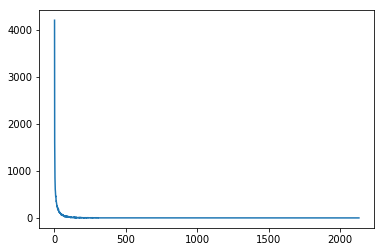

In [11]:
xs = [p[0] for p in ppi_distrib]
ys = [p[1] for p in ppi_distrib]
plt.plot(xs, ys)
plt.show()

In the cells above we did two things. First, we imported *matplotlib*, a Python library for generating plots.

Our degree distribution `ppi_distrib`, then, is represented in Python as a series of pairs of numbers: `(degree, number of nodes)`. If we want to plot these values as points with an $x$ and a $y$ coordinate, we need to isolate all the degrees ($x$ values) into a list; and similarly all the "number of nodes" ($y$ values) into a second list.

Our code is correct, and yet the plot is quite difficult to interpret. The reason is that both types of values ($x$ and $y$ coordinates) span a large range. In situations like this one, using the logarithmic scale comes handy.

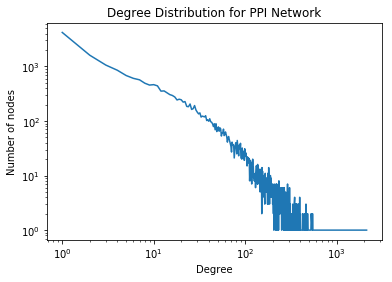

In [12]:
fig, ax = plt.subplots()
ax.loglog(xs, ys)
ax.set_xlabel("Degree")
ax.set_ylabel("Number of nodes")
ax.set_title("Degree Distribution for PPI Network")
plt.show()

The code has become only slightly more complicated than before. We switched to the `loglog` function for changing the scales of the axes. We also took the opportunity to add a few labels to make the plot more readable.

We won't provide an interpretation of this plot straight away. Rather, we will add a second curve to the plot, representing the random graph. Let's see what appears!

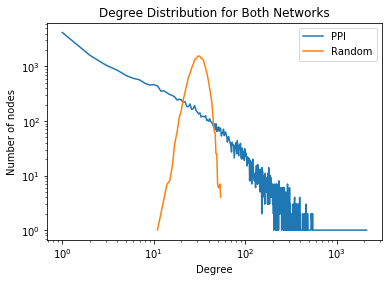

In [13]:
rnd_distrib = [(p.GetVal1(), p.GetVal2()) for p in rg.GetDegCnt()]
rxs = [p[0] for p in rnd_distrib]
rys = [p[1] for p in rnd_distrib]

fig, ax = plt.subplots()
ax.loglog(xs, ys, label = "PPI")
ax.loglog(rxs, rys, label = "Random")
ax.set_xlabel("Degree")
ax.set_ylabel("Number of nodes")
ax.set_title("Degree Distribution for Both Networks")

ax.legend()
plt.show()

A few notes on the code above:

  * **Lines 1-3.** We compute the degree distribution of the random graph, and we split $x$ and $y$ coordinates for every entry.
  * **Line 7.** We plot a second curve for the random network. We attach to it a label, to keep track of its meaning.
  * **Line 12.** We ask Matplotlib to generate a legend.

Now let's go back to the plot. It is evident that the two degree distributions are completely different. While the distribution for the random graph is shaped like a bell, the distribution of the PPI follows a straight line (at least, in the central part of the plot). The latter is called a **scale-free** distribution. As we said, it is associated with a small number of highly connected nodes (proteins), known as "**hubs**," playing a central role in the network.

In a scale-free network, the number of nodes with a given degree can be computed thanks to a simple mathematical relation. A *power-law* of the form:

$$N(k) \propto k^{- \gamma}$$

Here $k$ is a degree value, $N(k)$ is the (expected) number of nodes with that degree and $\gamma$ is a real exponent specific to the network under consideration.

What is the value of $\gamma$ characterizing the PPI network we are studying? To answer this question we need to *fit* the above power-law to the data. In other terms, we should find the value of $\gamma$ that makes the power-law curve as close as possible to the one deriving from the data.

Before we get there, we can try to come up with a rough guess by observing the above plots carefully. It looks to me  that around 1000 nodes have degree 1. And then the curve decreases by one order of magnitude every time the degree increases by 10: this would correspond to an exponent of $-1$. We can plug these two numbers into the power-law equation and plot the resulting prediction.

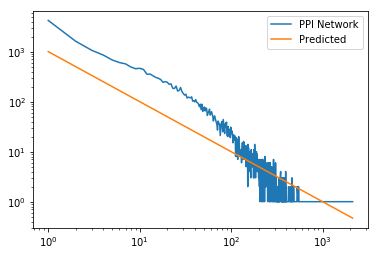

In [14]:
pls = [1000 * pow(x, -1) for x in xs]
fig, ax = plt.subplots()
ax.loglog(xs, ys, label="PPI Network")
ax.loglog(xs, pls, label="Predicted")
ax.legend()
plt.show()

Not great, but not bad either! It looks like we are already quite close to the optimal solution.

To find the best parameter values, we will use the [scikit-learn](https://scikit-learn.org/) package for machine learning. The law we are trying to fit is non-linear because of the exponential relationship between the degree and $\gamma$. However, we can use a simple trick to make it easier to handle. If we take the logarithm of both sides of the equation:

$$F = a \cdot k^{- \gamma}$$

we obtain:

$$ \log (F) = \log (a) - \gamma \cdot \log (k) $$

which after some renaming becomes:

$$ f = a + b k $$

That's the equation for a straight line. If we transform all numerical values by applying the logarithm, we can use the standard machinery for linear regression to perform our fit.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

lxs = np.log(xs)
lys = np.log(ys)

fit = LinearRegression().fit(lxs.reshape(-1, 1), lys)
print("Fitted intercept:", np.exp(fit.intercept_))
print("Fitted slope:    ", fit.coef_[0])

Fitted intercept: 19884.4792641
Fitted slope:     -1.5618994864


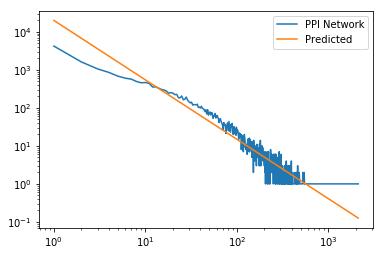

In [16]:
pls = [np.exp(fit.intercept_) * pow(x, fit.coef_[0]) for x in xs]
fig, ax = plt.subplots()
ax.loglog(xs, ys, label="PPI Network")
ax.loglog(xs, pls, label="Predicted")
ax.legend()
plt.show()

## Clustering Coefficient

The clustering coefficient is another measure that we can use to characterize the structure of a network, in addition to the degree distribution.

Every node in a graph has an associated clustering coefficient, and in general we should compute all of them. Since this operation is costly, here we are going to take a shortcut. We will sample `1000` nodes at random, and compute the clustering coefficient only for those. Our results will provide only an approximation of the true values. For the purpose of our discussion, that will suffice.

In [17]:
def random_node_sample(graph):
    import random
    all_nodes = [n.GetId() for n in graph.Nodes()]
    return random.choices(all_nodes, k = 1000)

In [18]:
ppi_node_sample = random_node_sample(g)
rnd_node_sample = random_node_sample(rg)

ppi_ccs = [g.GetNodeClustCf(n)  for n in ppi_node_sample]
rnd_ccs = [rg.GetNodeClustCf(n) for n in rnd_node_sample]

If we are interested in a network-level summary, we can compute the average clustering coefficient over all the sampled nodes.

In [19]:
sum(ppi_ccs) / len(ppi_ccs)

0.12857004318411538

In [20]:
sum(rnd_ccs) / len(rnd_ccs)

0.0013913191209503494

As you can notice, the average clustering coefficient for the PPI network is ~ 100 times larger than the corresponding value for the random graph. This reinforces the observation that an organized network is more tightly interconnected than what we would expect in the case of a random structure.

At this point we might expect the hubs of the PPI network to have the largest clustering coefficients. It takes a few lines of code to verify this.

In [21]:
ppi_dgs = [g.GetNI(n).GetDeg() for n in ppi_node_sample]

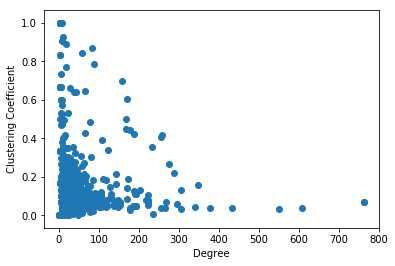

In [22]:
fig, ax = plt.subplots()
ax.scatter(ppi_dgs, ppi_ccs)
ax.set_xlabel("Degree")
ax.set_ylabel("Clustering Coefficient")
plt.show()

Perhaps surprisingly, the plot aboves shows an **inverse** relationship between degree and clustering coefficient. In other terms, hubs (high degrees, large $x$ coordinate) tend to have lower clustering coefficients ($y$ coordinate).

This is not an error in our analysis. These hubs do not tend to form dense clusters with their neighbors, despite having many interactions with them.

This low clustering coefficient of hubs is thought to play a crucial role in the functioning of the network. The hubs serve as connectors between different functional modules in the network, allowing for the rapid transfer of information and material between these modules. If the hubs had a high clustering coefficient, they would have been more tightly connected to a specific functional module, rather than serving as a bridge between modules.

## Shortest Paths

The shortest path between two nodes in the network, A and B, is defined as the shortest sequence of nodes which we should cross to get from A to B along some edges.

![A small graph](images/tree.png)

If we go back to the same toy example we used before, the shortest path from node **2** to node **6** would be:

$$\{ 2, 4, 5, 6 \}$$

This concept is useful for defining the distance between any pair of nodes. As an example, let's compute the distances between node 1394 (then Entrez Gene identifier for the human protein CRHR1, *corticotropin releasing hormone receptor 1*) and all the other nodes in the network.

In [23]:
max_dist, distances = g.GetShortPathAll(1394)
print("Maximum distance:         ", max_dist)
print("Number of target proteins:", len(distances))
print("Total number of proteins: ", g.GetNodes())

Maximum distance:          6
Number of target proteins: 21521
Total number of proteins:  21557


The first value, `6`, tells us that starting from CRHR1 we need to cross at most six edges to reach any other connected protein. Notice that not all proteins in the network might be reachable from CRHR1. Indeed, we observe that $21557 - 21521 = 36$ proteins do not appear in `distances`: this means that there is no path connecting them with 1394.

This is a single example, though, and we should not be drawing any conclusion quite yet. A better measure for the entire network is the **effective diameter**, defined as the 90-th percentile of the distribution of shortest path lengths. Computing *all* the shortest paths is another computationally intensive operation we should avoid. To strike a balance, we will select 50 nodes at random and consider only the shortest paths starting at them.

In [24]:
g.GetBfsEffDiam(50)

3.828188704318937

We mentioned that scale-free are robust to the random removal of nodes. We are now going to test this property by setting up a small experiment. Starting from the full network, we will drop multiple groups of 2000 randomly-selected nodes. After each batch of deletions, we will measure how the effective diameter has changed.

Since we will be using deletion multiple times, we define a function implementing this step.

In [25]:
def delete_random_nodes(g, n):
    for _ in range(n):
        id_ = g.GetRndNId()
        g.DelNode(id_)

We are ready to perform our experiment on the PPI network.

In [26]:
from tqdm import tqdm

g_copy = g.ConvertGraph(snap.TUNGraph)
initial_diameter = g_copy.GetBfsEffDiam(50)

ppi_diameters = []
for _ in tqdm(range(10)):
    delete_random_nodes(g_copy, 2000)
    ppi_diameters.append(g_copy.GetBfsEffDiam(50) / initial_diameter)

100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


A few notes on the code above:
    
  * **Line 1.** Since the computation is going to take some time, we use the excellent *tqdm* library to display a progress bar.
  * **Line 3.** Every time we delete a node, we modify the original network object. Since we will be using the full network again, here we make a temporary copy.
  * **Lines 4, 9.** Instead of storing the absolute value of the diameter, we keep track of if ratio to the initial value. This will make it easier to appreciate the *relative* change with respect to the full network.
  
With a small change to the code, we can apply the same procedure to the random network.

In [27]:
rg_copy = rg.ConvertGraph(snap.TUNGraph)
initial_diameter = rg_copy.GetBfsEffDiam(50)
rnd_diameters = []
for _ in tqdm(range(10)):
    delete_random_nodes(rg_copy, 2000)
    rnd_diameters.append(rg_copy.GetBfsEffDiam(50) / initial_diameter)

100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


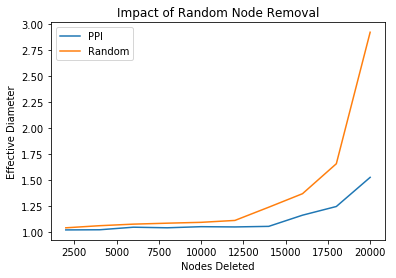

In [28]:
fig, ax = plt.subplots()

removed = [(i+1)*2000 for i in range(len(ppi_diameters))]
ax.plot(removed, ppi_diameters, label = "PPI")
ax.plot(removed, rnd_diameters, label = "Random")
ax.set_xlabel("Nodes Deleted")
ax.set_ylabel("Effective Diameter")
ax.set_title("Impact of Random Node Removal")

ax.legend()
plt.show()

The plot above shows clearly the different effects of random node removal in the two networks. The effective diameter of the PPI network increases only slightly, while that of the random network almost triples.

Immagine now you are a node in the PPI network, and you want to send a signal to a specific target. Even when a significant fraction of the network is damaged (i.e., proteins have been knocked-out), the effort you need to make remains more or less constant. In the case of a random graph, on the other hand, your message would have traveled about three times the distance to reach its destination.

This nice property of scale-free networks is a tradeoff, though. It makes networks more resistent to one type of attack (random node removal), but more subsceptible to targeted attacks. 

In [29]:
def delete_highest_degree_nodes(g, n):
    degrees = [(n.GetDeg(), n.GetId()) for n in g.Nodes()]
    degrees.sort(reverse=True)
    
    for _, id_ in degrees[:n]:
        g.DelNode(id_)

g_copy = g.ConvertGraph(snap.TUNGraph)
initial_diameter = g_copy.GetBfsEffDiam(50)

ppi_diameters = []
for _ in tqdm(range(10)):
    delete_highest_degree_nodes(g_copy, 500)
    ppi_diameters.append(g_copy.GetBfsEffDiam(50) / initial_diameter)

100%|██████████| 10/10 [00:04<00:00,  2.10it/s]


The function `delete_highest_degree_nodes()` computes (line 2) the degrees of all the nodes, and then orders the results by *decreasing* degree. The first $n$ entries in this list are then removed from the network.

In [30]:
rg_copy = rg.ConvertGraph(snap.TUNGraph)
initial_diameter = rg_copy.GetBfsEffDiam(50)

rnd_diameters = []
for _ in tqdm(range(10)):
    delete_highest_degree_nodes(rg_copy, 500)
    rnd_diameters.append(rg_copy.GetBfsEffDiam(50) / initial_diameter)

100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


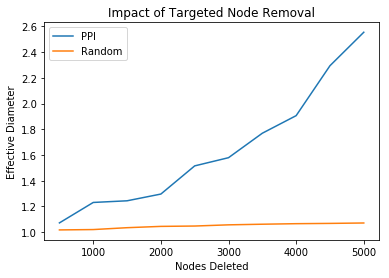

In [31]:
fig, ax = plt.subplots()

removed = [(i+1)*500 for i in range(len(ppi_diameters))]
ax.plot(removed, ppi_diameters, label = "PPI")
ax.plot(removed, rnd_diameters, label = "Random")
ax.set_xlabel("Nodes Deleted")
ax.set_ylabel("Effective Diameter")
ax.set_title("Impact of Targeted Node Removal")

ax.legend()
plt.show()

In this plot we observe an opposite effect: it's the diameter of the PPI network that increases threefold.

In general, one cannot protect a network from *all* kinds of attacks. What we have learned here is that PPIs have evolved to cope with random removals, but in doing so have become *more* susceptible to targeted attacks.

## PageRank

The PageRank algorithm was initially developed to rank the importance of web pages within the (very large) network of the World Wide Web.

It makes use of Markov Models framework to represent the activity of an hypothetical user surfing the web. At each turn, such user chooses between one of two possibilities.

  * With probability $d$, he closes the current browser window and opens a new webpage completely at random.
  
  * Otherwise (hence with probability $1-d$), he clicks on one of the hyperlinks present in the webpage he has opened. His browser transitions to the corresponding site.

The rank of a webpage, then, is simply the probability of the user viewing that page in the limiting distribution of the process.

Here we will apply the same algorithm to the study of the PPI network.

For technical reasons, we will rely on a different Python library for representing graphs: [NetworkX](https://networkx.org/). Luckily, the code for loading the graph in memory is similar to the one with used previously.

In [33]:
import networkx as nx

nxg = nx.Graph()

with open("network.csv", "rt") as fd:
    for line in fd:
        src, tgt = line.split(",")
        src = int(src)
        tgt = int(tgt)
        
        nxg.add_edge(src, tgt)

NetworkX automates the entire computation of PageRanks. We only need to specify the value for the *damping factor*  $\alpha$, that is the $1-d$ probability we discussed above. Our choice is to set $\alpha = 0.9$.

In [34]:
%%time
pr = nx.pagerank(nxg, alpha=0.9)

CPU times: user 19.2 s, sys: 410 ms, total: 19.6 s
Wall time: 19.6 s


The object returned by `pagerank()` is a *dictionary*, a kind of Python object that links the identifier of each node to the corresponding rank.

For instance, say we want to retrieve the PageRank for the gene CRHR1 (Entrez 1394). One lookup into `pr` is sufficient to extract this information.

In [35]:
pr[1394]

3.6093571497394284e-05

It is difficult to evaluate the magnitude of this value in absolute terms. A better approach would be to order the  nodes by their rank, from the largest to the smallest.

In the code above we use the function `sorted()`, providing as arguments:

  * All the items within the dictionary, that is pairs of the form `(node_id, rank_value)`;
  * A prescription of which of these two values to use for the ordering. We clearly want to use the second entry of each pair, which corresponds to the rank;
  * Since we want the largest ranks first, we require a *reversed* ordering.

In [36]:
sorted_nodes = sorted(pr.items(), key=lambda pair: pair[1], reverse=True)
sorted_nodes[:2]

[(7316, 0.005073998140148472), (351, 0.0037211210393576334)]

Nodes `7316` and `351` are the most important accoring to the PageRank score.

An interesting question is: if we had just used the degree of the nodes to order them, would we have got the same result? Go back at the beginning of the notebook and check this!